### Always Run

In [58]:
### import necessary libraries
import numpy as np
import pandas as pd
import csv
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import os
from scipy import stats
from scipy.optimize import curve_fit
import math

In [59]:
### Directory where the data is stored
#dir  = "D:\\Xenium" #Windows
dir = "/mnt/d/Xenium" #Ubuntu
# dir = "/mnt/d/Xenium/run1-newsegment" #Ubuntu
dir_notebook = '/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook'

#dir  = "D:\\Xenium\Laura\saggital" #Windows
#dir = "/mnt/d/Xenium/Laura/saggital" #Ubuntu

In [60]:
### HC ###

### make a list of samples and their ids to make the cell names unique
#samples = ["2505-1__20240404__003359", "2505-2__20240404__003359", "2670-1__20240404__003359", "3159-1__20240321__212855", "3160-1__20240321__212855", "3160-2__20240321__212855"]
#samples_ids = ["2505-1", "2505-2", "2670-1", "3159-1", "3160-1", "3160-2"]
#name_dir = 'run1-2'

### Run 1 resegmented
# samples = ["2505-1_subsampled", "2505-2_subsampled", "2670-1_subsampled", 
#     "3159-1_subsampled"
#     , "3160-1_subsampled", "3160-2_subsampled"
# ]
# samples_ids = ["2505-1", "2505-2", "2670-1", 
#                "3159-1", "3160-1", "3160-2"
#                 ]
# name_dir = 'run1-resegment'

# #Run 3
#samples = ["3159-2__20240530__205547", "3159-3__20240530__205547", "3159-4__20240530__205547", "3161-1__20240530__205547", "3161-2__20240530__205547", "3161-3__20240530__205547"]
#samples_ids = ["3159-2", "3159-3", "3159-4", "3161-1", "3161-2", "3161-3"]

# Run 3 Habenula
samples = ["3159-2__20240530__205547", "3161-1__20240530__205547"]
samples_ids = ["3159-2", "3161-1"]
name_dir = 'run3-Habenula'

# Run 3 LGN
#samples = ["3159-3__20240530__205547", "3161-2__20240530__205547"]
#samples_ids = ["3159-3","3161-2"]
#name_dir = 'run3-LGN'

#Run 3 SC
#samples = ["3159-4__20240530__205547","3161-3__20240530__205547"]
#samples_ids = ["3159-4", "3161-3"]
#name_dir = 'run3-SC'


### Laura ###
#Coronal
#samples = ["LvR_82_MH17-B__20240321__21285", "LvR_88_FH17__20240404__003359", "LvR_95_FH17__20240404__003359", "LvR_106_MH17__20240321__212855", "LvR_107_FL17__20240404__003359", "LvR_78_ML17__20240321__212855"]
#samples_ids = ["82-MH17-B", "88-FH17", "95-FH17", "106-MH17", "107-FL17", "78-ML17"]
#name_dir = 'coronal'

#Saggital
#samples = ["CTRL-68-1__20240517__205823","WFF-64-1__20240517__205823","WFF-64-2__20240517__205823","CTRL-94-1__20240517__205823","WFF-66-1__20240517__205823", "WFF-66-2__20240517__205823"]
#samples_ids = ["CTRL-68-1","WFF-64-1","WFF-64-2","CTRL-94-1","WFF-66-1", "WFF-66-2"]
#name_dir = 'saggital"

# Animation

/tmp/ipykernel_39479/1035991183.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['umap-3'] = adata.obsm['reduced_pc_20_umap'][:, 0]


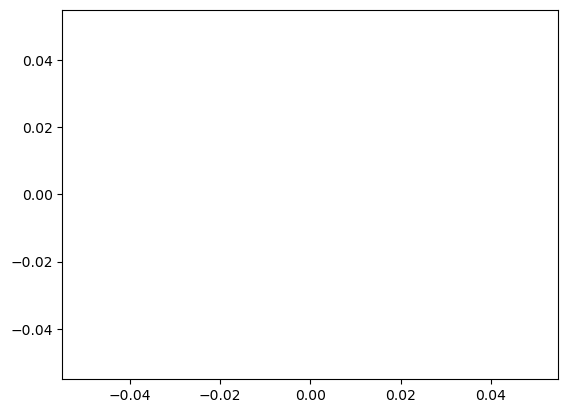

MovieWriter Pillow unavailable; using Pillow instead.


In [66]:
from sklearn.preprocessing import LabelEncoder
from matplotlib.animation import FuncAnimation
import scanpy as sc

adata = sc.read_h5ad(f'{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated.h5ad')
adata = adata[(adata.obs['sample']=='3159-2')]

adata.obs['umap-3'] = adata.obsm['reduced_pc_20_umap'][:, 0]
adata.obs['umap-4'] = adata.obsm['reduced_pc_20_umap'][:, 1]

adata.obs['x_centroid'].astype('float')
adata.obs['y_centroid'].astype('float')
adata.obs['y_centroid'].astype('float')
adata.obs['umap-1'].astype('float')
adata.obs['umap-2'].astype('float')

adata.obs['umap-1'] = adata.obs['umap-1'] + abs(adata.obs['umap-1'].min())
adata.obs['umap-2'] = adata.obs['umap-2'] + abs(adata.obs['umap-2'].min())
adata.obs['umap-1'] = adata.obs['umap-1'] / adata.obs['umap-1'].max()
adata.obs['umap-2'] = adata.obs['umap-2'] / adata.obs['umap-2'].max()
adata.obs['x_centroid'] = adata.obs['x_centroid'] / adata.obs['x_centroid'].max()
adata.obs['y_centroid'] = adata.obs['y_centroid'] / adata.obs['y_centroid'].max()



# Extract data
x1, y1 = adata.obs['x_centroid'].values, adata.obs['y_centroid'].values
x2, y2 = adata.obs['umap-1'].values, adata.obs['umap-2'].values

clusters = adata.obs['cell_type_newnum'].astype('float')
# Determine unique clusters for coloring
unique_clusters = np.unique(clusters)
colors = plt.cm.tab10(unique_clusters / max(unique_clusters))
# Create a dictionary to map clusters to colors
cluster_to_color = {cluster: color for cluster, color in zip(unique_clusters, colors)}
point_colors = [cluster_to_color[cluster] for cluster in clusters]



# Set up the figure and axis
fig, ax = plt.subplots()
scat = ax.scatter(adata.obs['umap-3'].values, adata.obs['umap-4'].values, c=point_colors, s = 0.01)

# # Function to interpolate points between two sets of coordinates
# def interpolate_points(x1, y1, x2, y2, t):
#     return (1 - t) * x1 + t * x2, (1 - t) * y1 + t * y2

# # Animation update function
# def update(frame):
#     t = frame / n_frames  # Normalize frame index to range [0, 1]
#     new_x, new_y = interpolate_points(adata.obs['x_centroid'].values, adata.obs['y_centroid'].values,
#                                        adata.obs['umap-1'].values, adata.obs['umap-2'].values, t)
#     scat.set_offsets(np.c_[new_x, new_y])
#     return scat,

# # Number of frames for the animation
# n_frames = 100

# # Create the animation
# ani = FuncAnimation(fig, update, frames=n_frames, interval=50, blit=True)

# Display the animation
plt.show()

# To save the animation as a file (e.g., .mp4), uncomment the line below:
ani.save('scatter_transformation.gif', writer='Pillow')


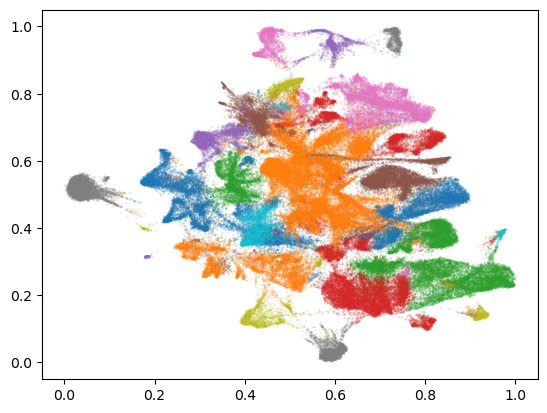

MovieWriter Pillow unavailable; using Pillow instead.


In [67]:
#Reverse
# Extract data
x2, y2 = adata.obs['x_centroid'].values, adata.obs['y_centroid'].values
x1, y1 = adata.obs['umap-1'].values, adata.obs['umap-2'].values

clusters = adata.obs['cell_type_newnum'].values
# Determine unique clusters for coloring
unique_clusters = np.unique(clusters)
colors = plt.cm.tab10(unique_clusters / max(unique_clusters))
# Create a dictionary to map clusters to colors
cluster_to_color = {cluster: color for cluster, color in zip(unique_clusters, colors)}
point_colors = [cluster_to_color[cluster] for cluster in clusters]



# Set up the figure and axis
fig, ax = plt.subplots()
scat = ax.scatter(adata.obs['umap-1'].values, adata.obs['umap-2'].values, c=point_colors, s = 0.01)

# Function to interpolate points between two sets of coordinates
def interpolate_points(x1, y1, x2, y2, t):
    return (1 - t) * x1 + t * x2, (1 - t) * y1 + t * y2

# Animation update function
def update(frame):
    t = frame / n_frames  # Normalize frame index to range [0, 1]
    new_x, new_y = interpolate_points(adata.obs['umap-1'].values, adata.obs['umap-2'].values, 
                                      adata.obs['x_centroid'].values, adata.obs['y_centroid'].values, t)
    scat.set_offsets(np.c_[new_x, new_y])
    return scat,

# Number of frames for the animation
n_frames = 100

# Create the animation
ani = FuncAnimation(fig, update, frames=n_frames, interval=50, blit=True)

# Display the animation
plt.show()

# To save the animation as a file (e.g., .mp4), uncomment the line below:
ani.save('scatter_transformation_reverse.gif', writer='Pillow')


In [12]:
adata = sc.read_h5ad(f'{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated.h5ad')

In [16]:
from sklearn.preprocessing import LabelEncoder
from matplotlib.animation import FuncAnimation
import scanpy as sc

adata = sc.read_h5ad(f'{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated.h5ad')
adata = adata[(adata.obs['sample']=='3161-1')]
adata = adata[(adata.obs['cell_type_newnum']==0)|(adata.obs['cell_type_newnum'] == 1)]


adata.obs['x_centroid'].astype('float')
adata.obs['y_centroid'].astype('float')
adata.obs['y_centroid'].astype('float')
adata.obs['umap-1'].astype('float')
adata.obs['umap-2'].astype('float')

adata.obs['umap-1'] = adata.obs['umap-1'] + abs(adata.obs['umap-1'].min())
adata.obs['umap-2'] = adata.obs['umap-2'] + abs(adata.obs['umap-2'].min())
adata.obs['umap-1'] = (adata.obs['umap-1'] / adata.obs['umap-1'].max()) + 1
adata.obs['umap-2'] = adata.obs['umap-2'] / adata.obs['umap-2'].max()
adata.obs['x_centroid'] = adata.obs['x_centroid'] / adata.obs['x_centroid'].max()
adata.obs['y_centroid'] = adata.obs['y_centroid'] / adata.obs['y_centroid'].max()

/tmp/ipykernel_6008/3650046543.py:16: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['umap-1'] = adata.obs['umap-1'] + abs(adata.obs['umap-1'].min())


In [37]:
adata.obs['sample'].unique()

['3161-1', '3159-2']
Categories (2, object): ['3159-2', '3161-1']

In [5]:
# from sklearn.preprocessing import LabelEncoder
# from matplotlib.animation import FuncAnimation
# import scanpy as sc

adata = sc.read_h5ad(f'{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated.h5ad')
# # adata = adata[(adata.obs['sample']=='3161-1')]


# adata.obs['x_centroid'].astype('float')
# adata.obs['y_centroid'].astype('float')
# adata.obs['y_centroid'].astype('float')
# adata.obs['umap-1'].astype('float')
# adata.obs['umap-2'].astype('float')

# adata.obs['umap-1'] = adata.obs['umap-1'] + abs(adata.obs['umap-1'].min())
# adata.obs['umap-2'] = adata.obs['umap-2'] + abs(adata.obs['umap-2'].min())
# adata.obs['umap-1'] = (adata.obs['umap-1'] / adata.obs['umap-1'].max()) + 1
# adata.obs['umap-2'] = adata.obs['umap-2'] / adata.obs['umap-2'].max()
# adata.obs['x_centroid'] = adata.obs['x_centroid'] / adata.obs['x_centroid'].max()
# adata.obs['y_centroid'] = adata.obs['y_centroid'] / adata.obs['y_centroid'].max()
# adata.obs.loc[adata.obs['sample'] == '3159-2', 'x_centroid'] = adata.obs.loc[adata.obs['sample'] == '3159-2', 'x_centroid']
# adata.obs.loc[adata.obs['sample'] == '3159-2', 'y_centroid'] = adata.obs.loc[adata.obs['sample'] == '3159-2', 'y_centroid']
# adata.obs.loc[adata.obs['sample'] == '3161-1', 'x_centroid'] = adata.obs.loc[adata.obs['sample'] == '3161-1', 'x_centroid'] + 2
# adata.obs.loc[adata.obs['sample'] == '3161-1', 'y_centroid'] = adata.obs.loc[adata.obs['sample'] == '3161-1', 'y_centroid']

# Extract data
clusters = adata.obs['cell_type_newnum'].values
# Determine unique clusters for coloring
unique_clusters = np.unique(clusters)
colors = plt.cm.tab10(unique_clusters / max(unique_clusters))
# Create a dictionary to map clusters to colors
cluster_to_color = {cluster: color for cluster, color in zip(unique_clusters, colors)}
point_colors = [cluster_to_color[cluster] for cluster in clusters]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(24, 7))
scat = ax.scatter(adata.obs['umap-1'].values, adata.obs['umap-2'].values, c=point_colors, s = 0.01)
plt.xlim(0, 3)
plt.ylim(-0.2, 1.2)

x2, y2 = adata.obs['x_centroid'].values, adata.obs['y_centroid'].values
x1, y1 = adata.obs['umap-1'].values, adata.obs['umap-2'].values

# Function to interpolate points between two sets of coordinates
def interpolate_points(x1, y1, x2, y2, t):
    
    return (1 - t) * x1 + t * x2, (1 - t) * y1 + t * y2

# Animation update function
def update(frame):
    t = frame / n_frames  # Normalize frame index to range [0, 1]
    new_x, new_y = interpolate_points(adata.obs['umap-1'].values, adata.obs['umap-2'].values, 
                                      adata.obs['x_centroid'].values, adata.obs['y_centroid'].values, t)
    scat.set_offsets(np.c_[new_x, new_y])
    return scat,

# Number of frames for the animation
n_frames =30

# Create the animation
ani = FuncAnimation(fig, update, frames=n_frames, interval=10, blit=True)

# Display the animation
plt.show()

# To save the animation as a file (e.g., .mp4), uncomment the line below:
ani.save('scatter_transformation_reverse3.gif', writer='Pillow')

NameError: name 'adata' is not defined

In [6]:
# adata = sc.read_h5ad(f'{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated.h5ad')
adata.obsm

AxisArrays with keys: X_pca, X_umap, coord_xy, reduced_pc_20, reduced_pc_20_umap

In [53]:
### DATA PREPARATION

from sklearn.preprocessing import LabelEncoder
from matplotlib.animation import FuncAnimation
import scanpy as sc

adata = sc.read_h5ad(f'{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated.h5ad')

adata.obs['umap-1'] = adata.obsm['reduced_pc_20_umap'][:, 0]
adata.obs['umap-2'] = adata.obsm['reduced_pc_20_umap'][:, 1]

adata.obs['x_centroid'].astype('float')
adata.obs['y_centroid'].astype('float')
adata.obs['y_centroid'].astype('float')
adata.obs['umap-1'].astype('float')
adata.obs['umap-2'].astype('float')

adata.obs['umap-1'] = adata.obs['umap-1'] + abs(adata.obs['umap-1'].min())
adata.obs['umap-2'] = adata.obs['umap-2'] + abs(adata.obs['umap-2'].min())
adata.obs['umap-1'] = ((adata.obs['umap-1'] / adata.obs['umap-1'].max()) * 1.5) +0.25
adata.obs['umap-2'] = ((adata.obs['umap-2'] / adata.obs['umap-2'].max()) * 1.5) + 3
adata.obs['x_centroid'] = adata.obs['x_centroid'] / adata.obs['x_centroid'].max()
adata.obs['y_centroid'] = adata.obs['y_centroid'] / adata.obs['y_centroid'].max()
adata.obs.loc[adata.obs['sample'] == '3159-1', 'x_centroid'] = adata.obs.loc[adata.obs['sample'] == '3159-1', 'x_centroid']
adata.obs.loc[adata.obs['sample'] == '3159-1', 'y_centroid'] = adata.obs.loc[adata.obs['sample'] == '3159-1', 'y_centroid'] + 2
adata.obs.loc[adata.obs['sample'] == '3160-1', 'x_centroid'] = adata.obs.loc[adata.obs['sample'] == '3160-1', 'x_centroid']
adata.obs.loc[adata.obs['sample'] == '3160-1', 'y_centroid'] = adata.obs.loc[adata.obs['sample'] == '3160-1', 'y_centroid'] + 1
adata.obs.loc[adata.obs['sample'] == '3160-2', 'x_centroid'] = adata.obs.loc[adata.obs['sample'] == '3160-2', 'x_centroid']
adata.obs.loc[adata.obs['sample'] == '3160-2', 'y_centroid'] = adata.obs.loc[adata.obs['sample'] == '3160-2', 'y_centroid']
adata.obs.loc[adata.obs['sample'] == '2670-1', 'x_centroid'] = adata.obs.loc[adata.obs['sample'] == '2670-1', 'x_centroid'] +1
adata.obs.loc[adata.obs['sample'] == '2670-1', 'y_centroid'] = adata.obs.loc[adata.obs['sample'] == '2670-1', 'y_centroid'] +2
adata.obs.loc[adata.obs['sample'] == '2505-1', 'x_centroid'] = adata.obs.loc[adata.obs['sample'] == '2505-1', 'x_centroid'] +1
adata.obs.loc[adata.obs['sample'] == '2505-1', 'y_centroid'] = adata.obs.loc[adata.obs['sample'] == '2505-1', 'y_centroid'] +1
adata.obs.loc[adata.obs['sample'] == '2505-2', 'x_centroid'] = adata.obs.loc[adata.obs['sample'] == '2505-2', 'x_centroid'] +1
adata.obs.loc[adata.obs['sample'] == '2505-2', 'y_centroid'] = adata.obs.loc[adata.obs['sample'] == '2505-2', 'y_centroid']

adata.obs.loc[adata.obs['sample'] == '3159-2', 'x_centroid'] = adata.obs.loc[adata.obs['sample'] == '3159-2', 'x_centroid']
adata.obs.loc[adata.obs['sample'] == '3159-2', 'y_centroid'] = adata.obs.loc[adata.obs['sample'] == '3159-2', 'y_centroid'] + 2
adata.obs.loc[adata.obs['sample'] == '3161-1', 'x_centroid'] = adata.obs.loc[adata.obs['sample'] == '3161-1', 'x_centroid']
adata.obs.loc[adata.obs['sample'] == '3161-1', 'y_centroid'] = adata.obs.loc[adata.obs['sample'] == '3161-1', 'y_centroid'] + 1

# Extract data
clusters = adata.obs['cell_type_newnum'].astype(float)
# Determine unique clusters for coloring
unique_clusters = np.unique(clusters)
colors = plt.cm.tab20b(unique_clusters / max(unique_clusters))
# Create a dictionary to map clusters to colors
cluster_to_color = {cluster: color for cluster, color in zip(unique_clusters, colors)}
point_colors = [cluster_to_color[cluster] for cluster in clusters]


In [54]:
adata.obs['cell_type_newnum'].unique()

['0', '1', '2', '3', '4', ..., '26', '27', '28', '29', '30']
Length: 31
Categories (31, object): ['0', '1', '2', '3', ..., '27', '28', '29', '30']

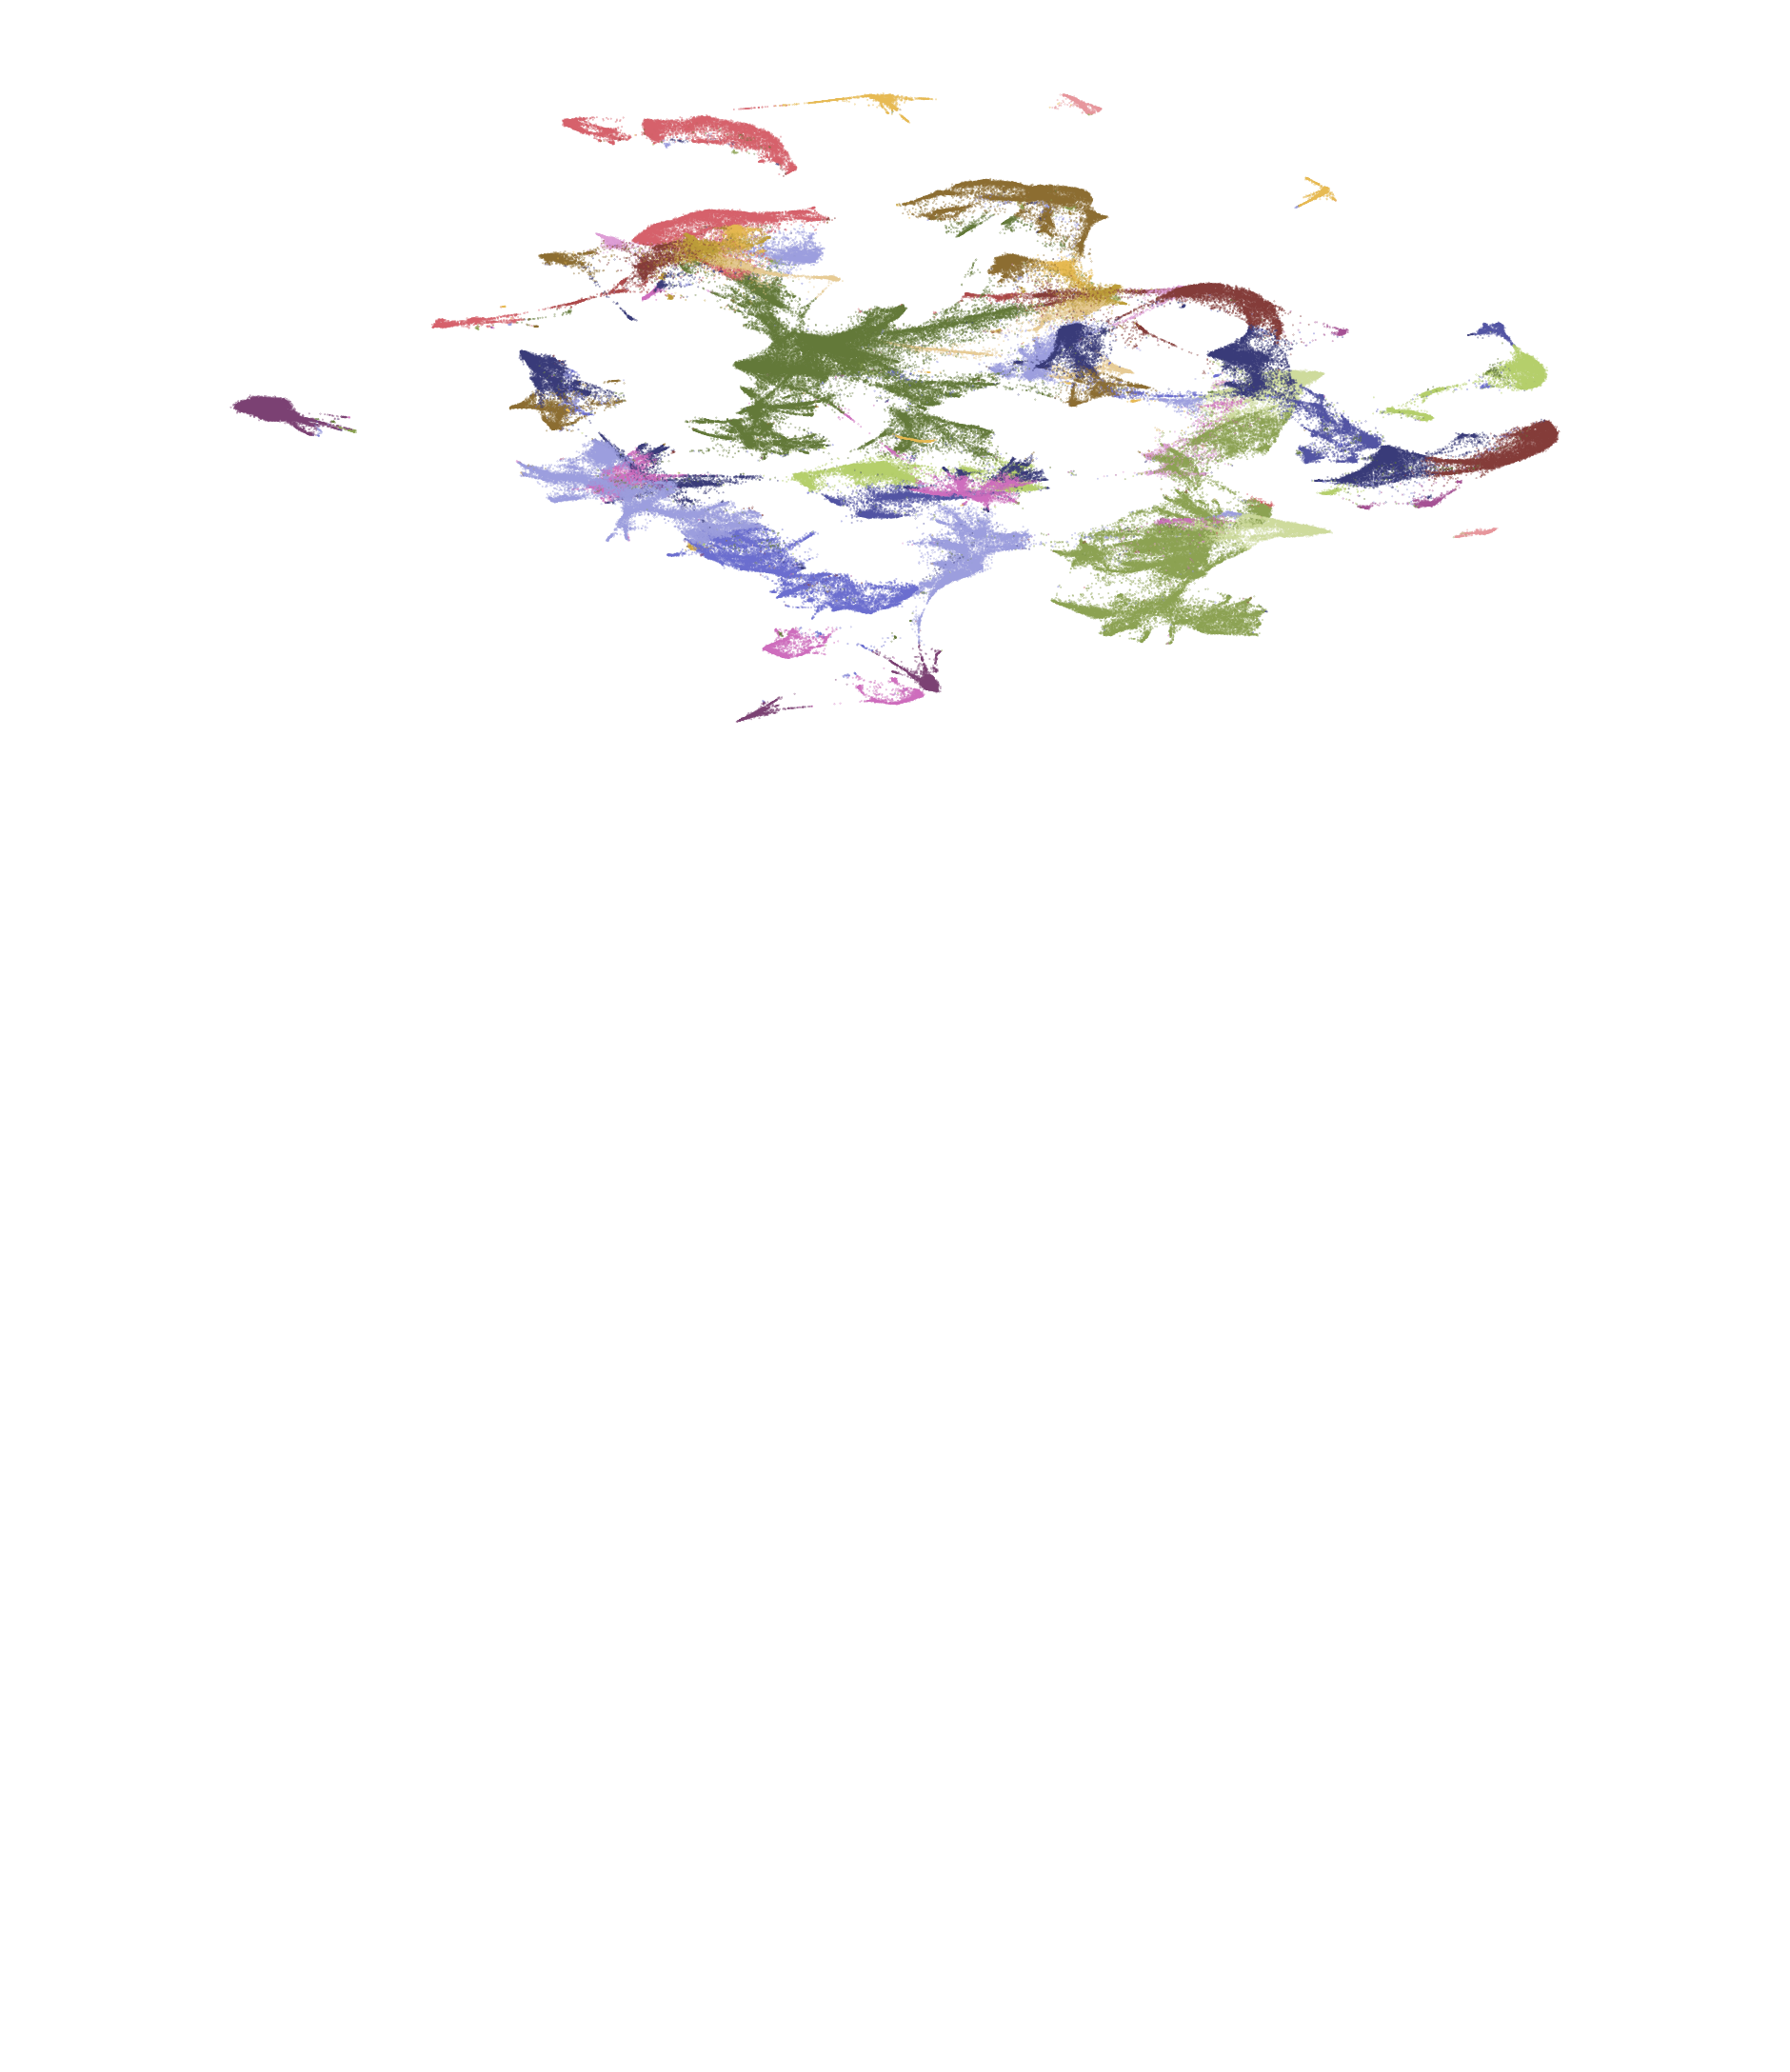

In [55]:
fig, ax = plt.subplots(figsize=(24, 28))
scat = ax.scatter(adata.obs['umap-1'].values, adata.obs['umap-2'].values, c=point_colors,
                  s = 0.05)
ax.axis('off')
plt.xlim(0, 2)
plt.ylim(-0.2, 4.7)
plt.savefig('umap-run1.png')

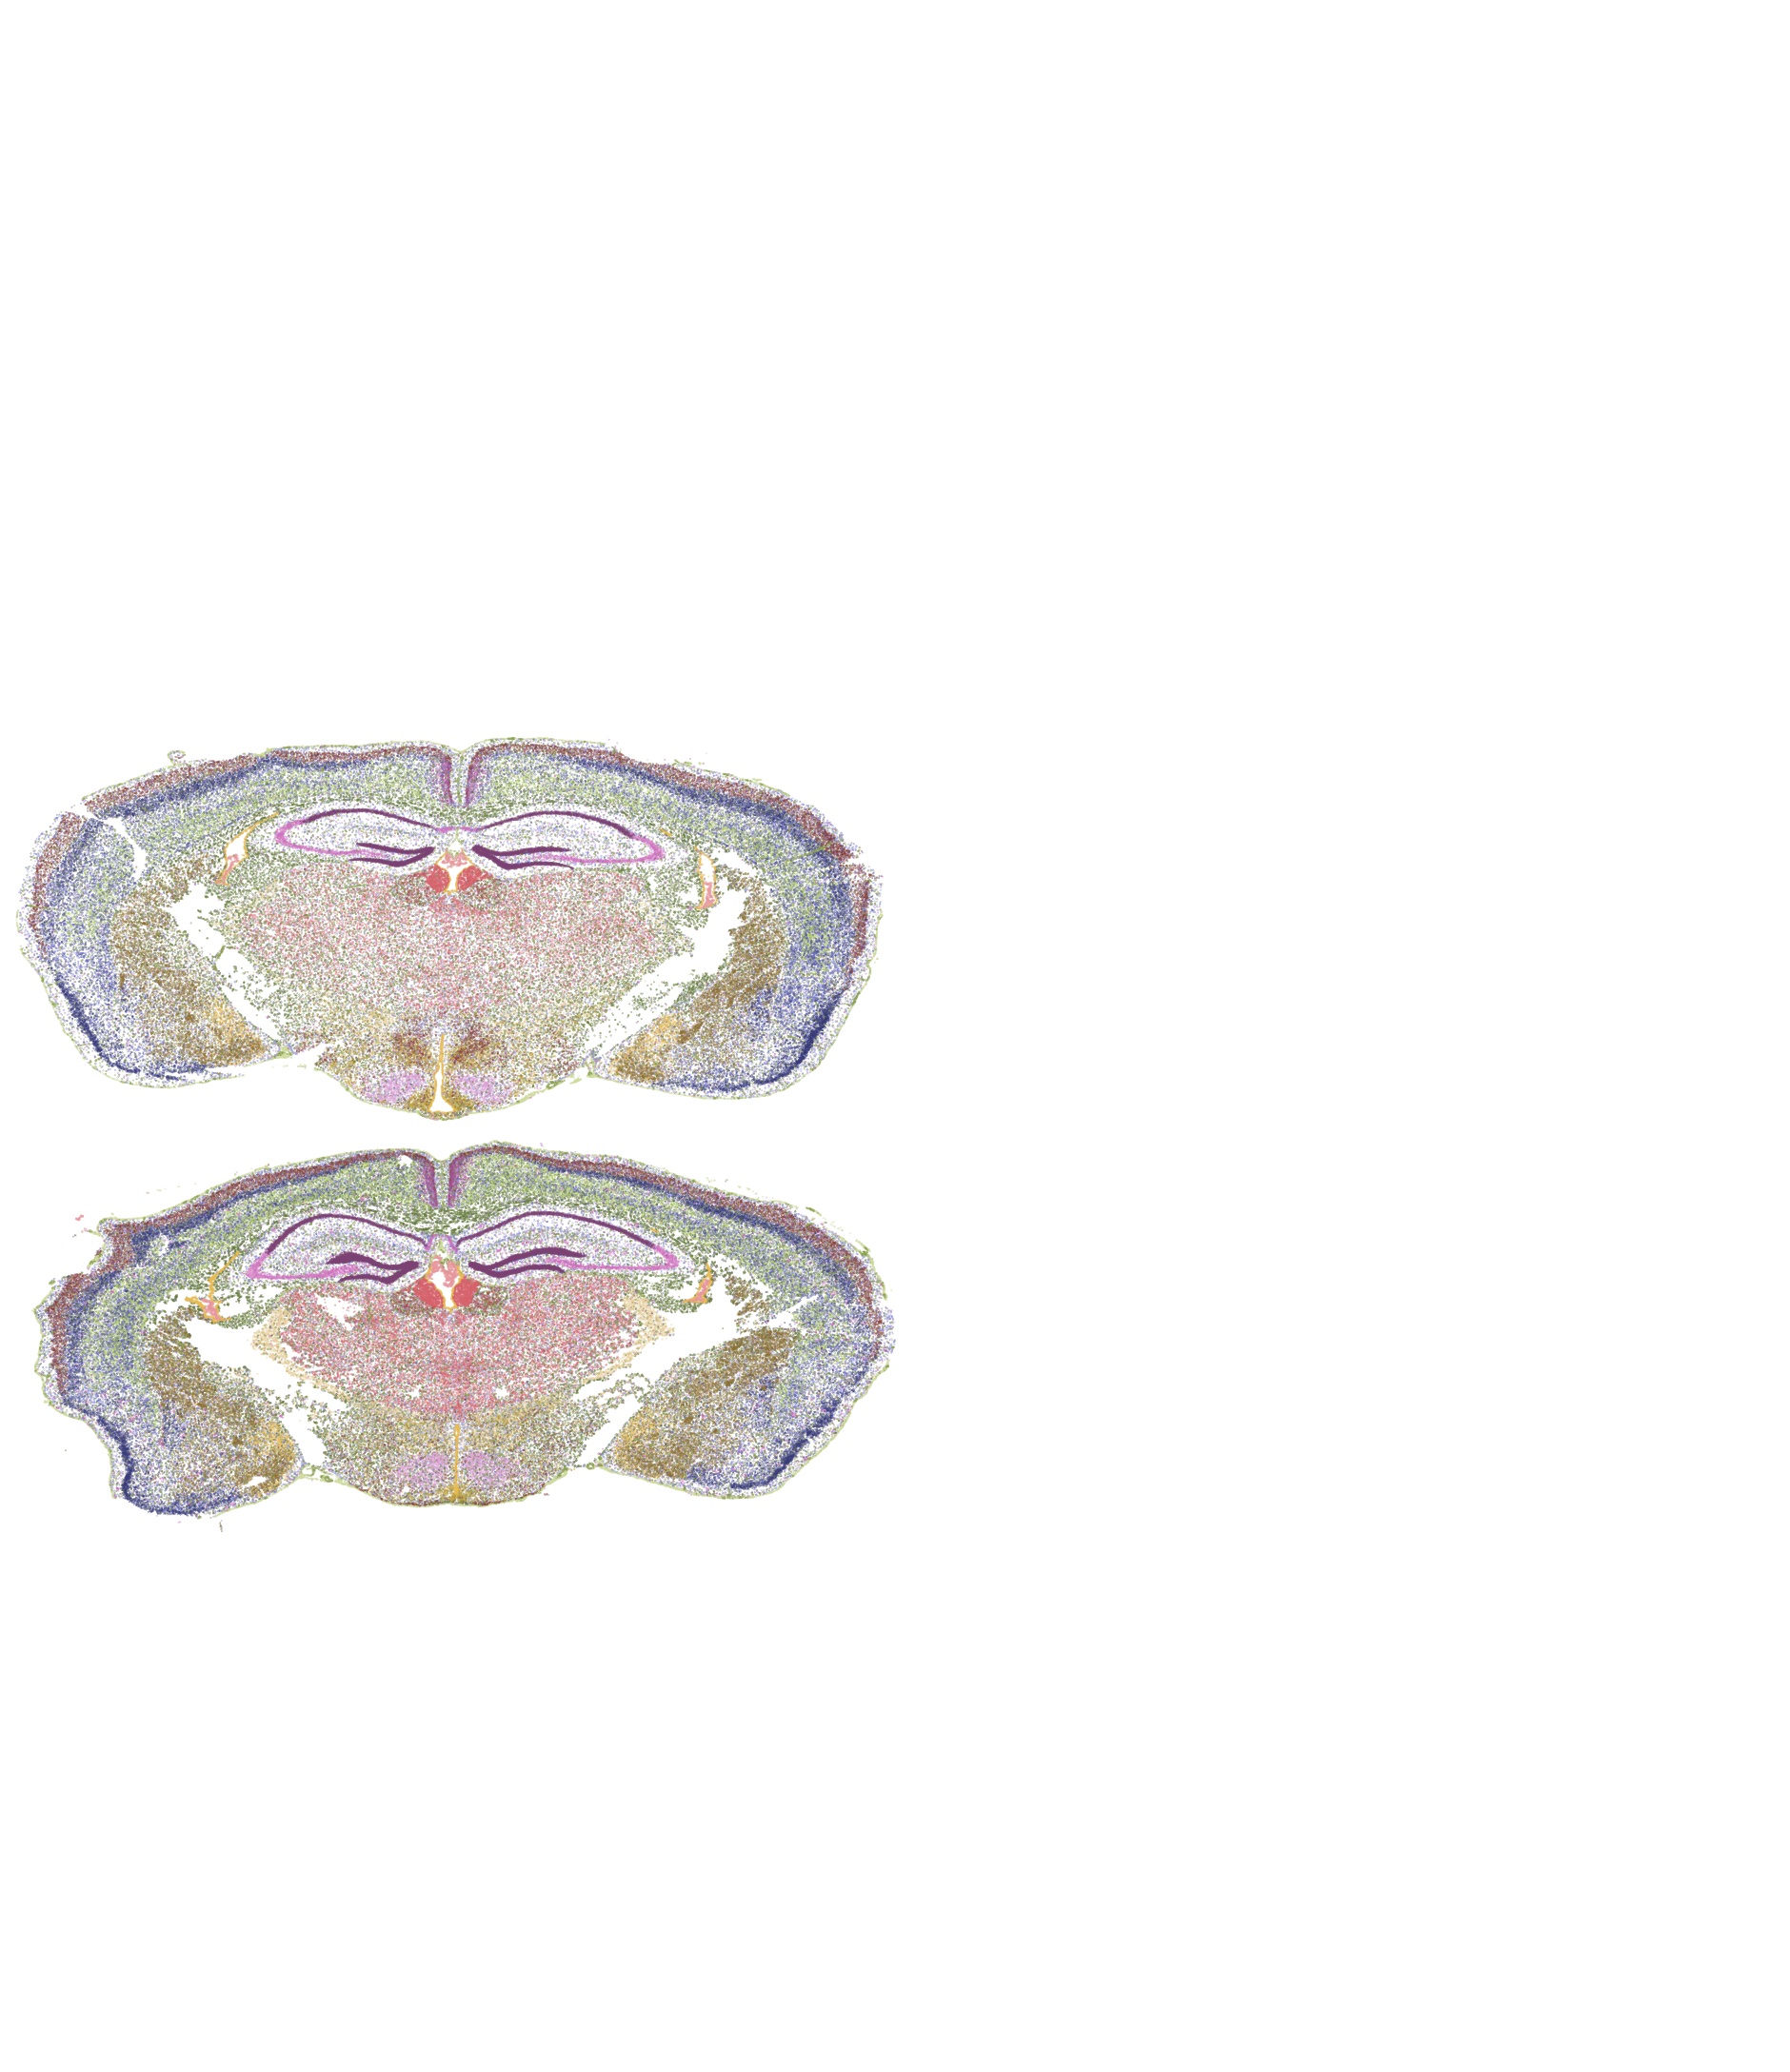

In [56]:
fig, ax = plt.subplots(figsize=(24, 28))
scat = ax.scatter(adata.obs['x_centroid'].values, adata.obs['y_centroid'].values, c=point_colors, s = 0.05)
ax.axis('off')
plt.xlim(0, 2)
plt.ylim(-0.2, 4.7)
plt.savefig('sections-run1.png')

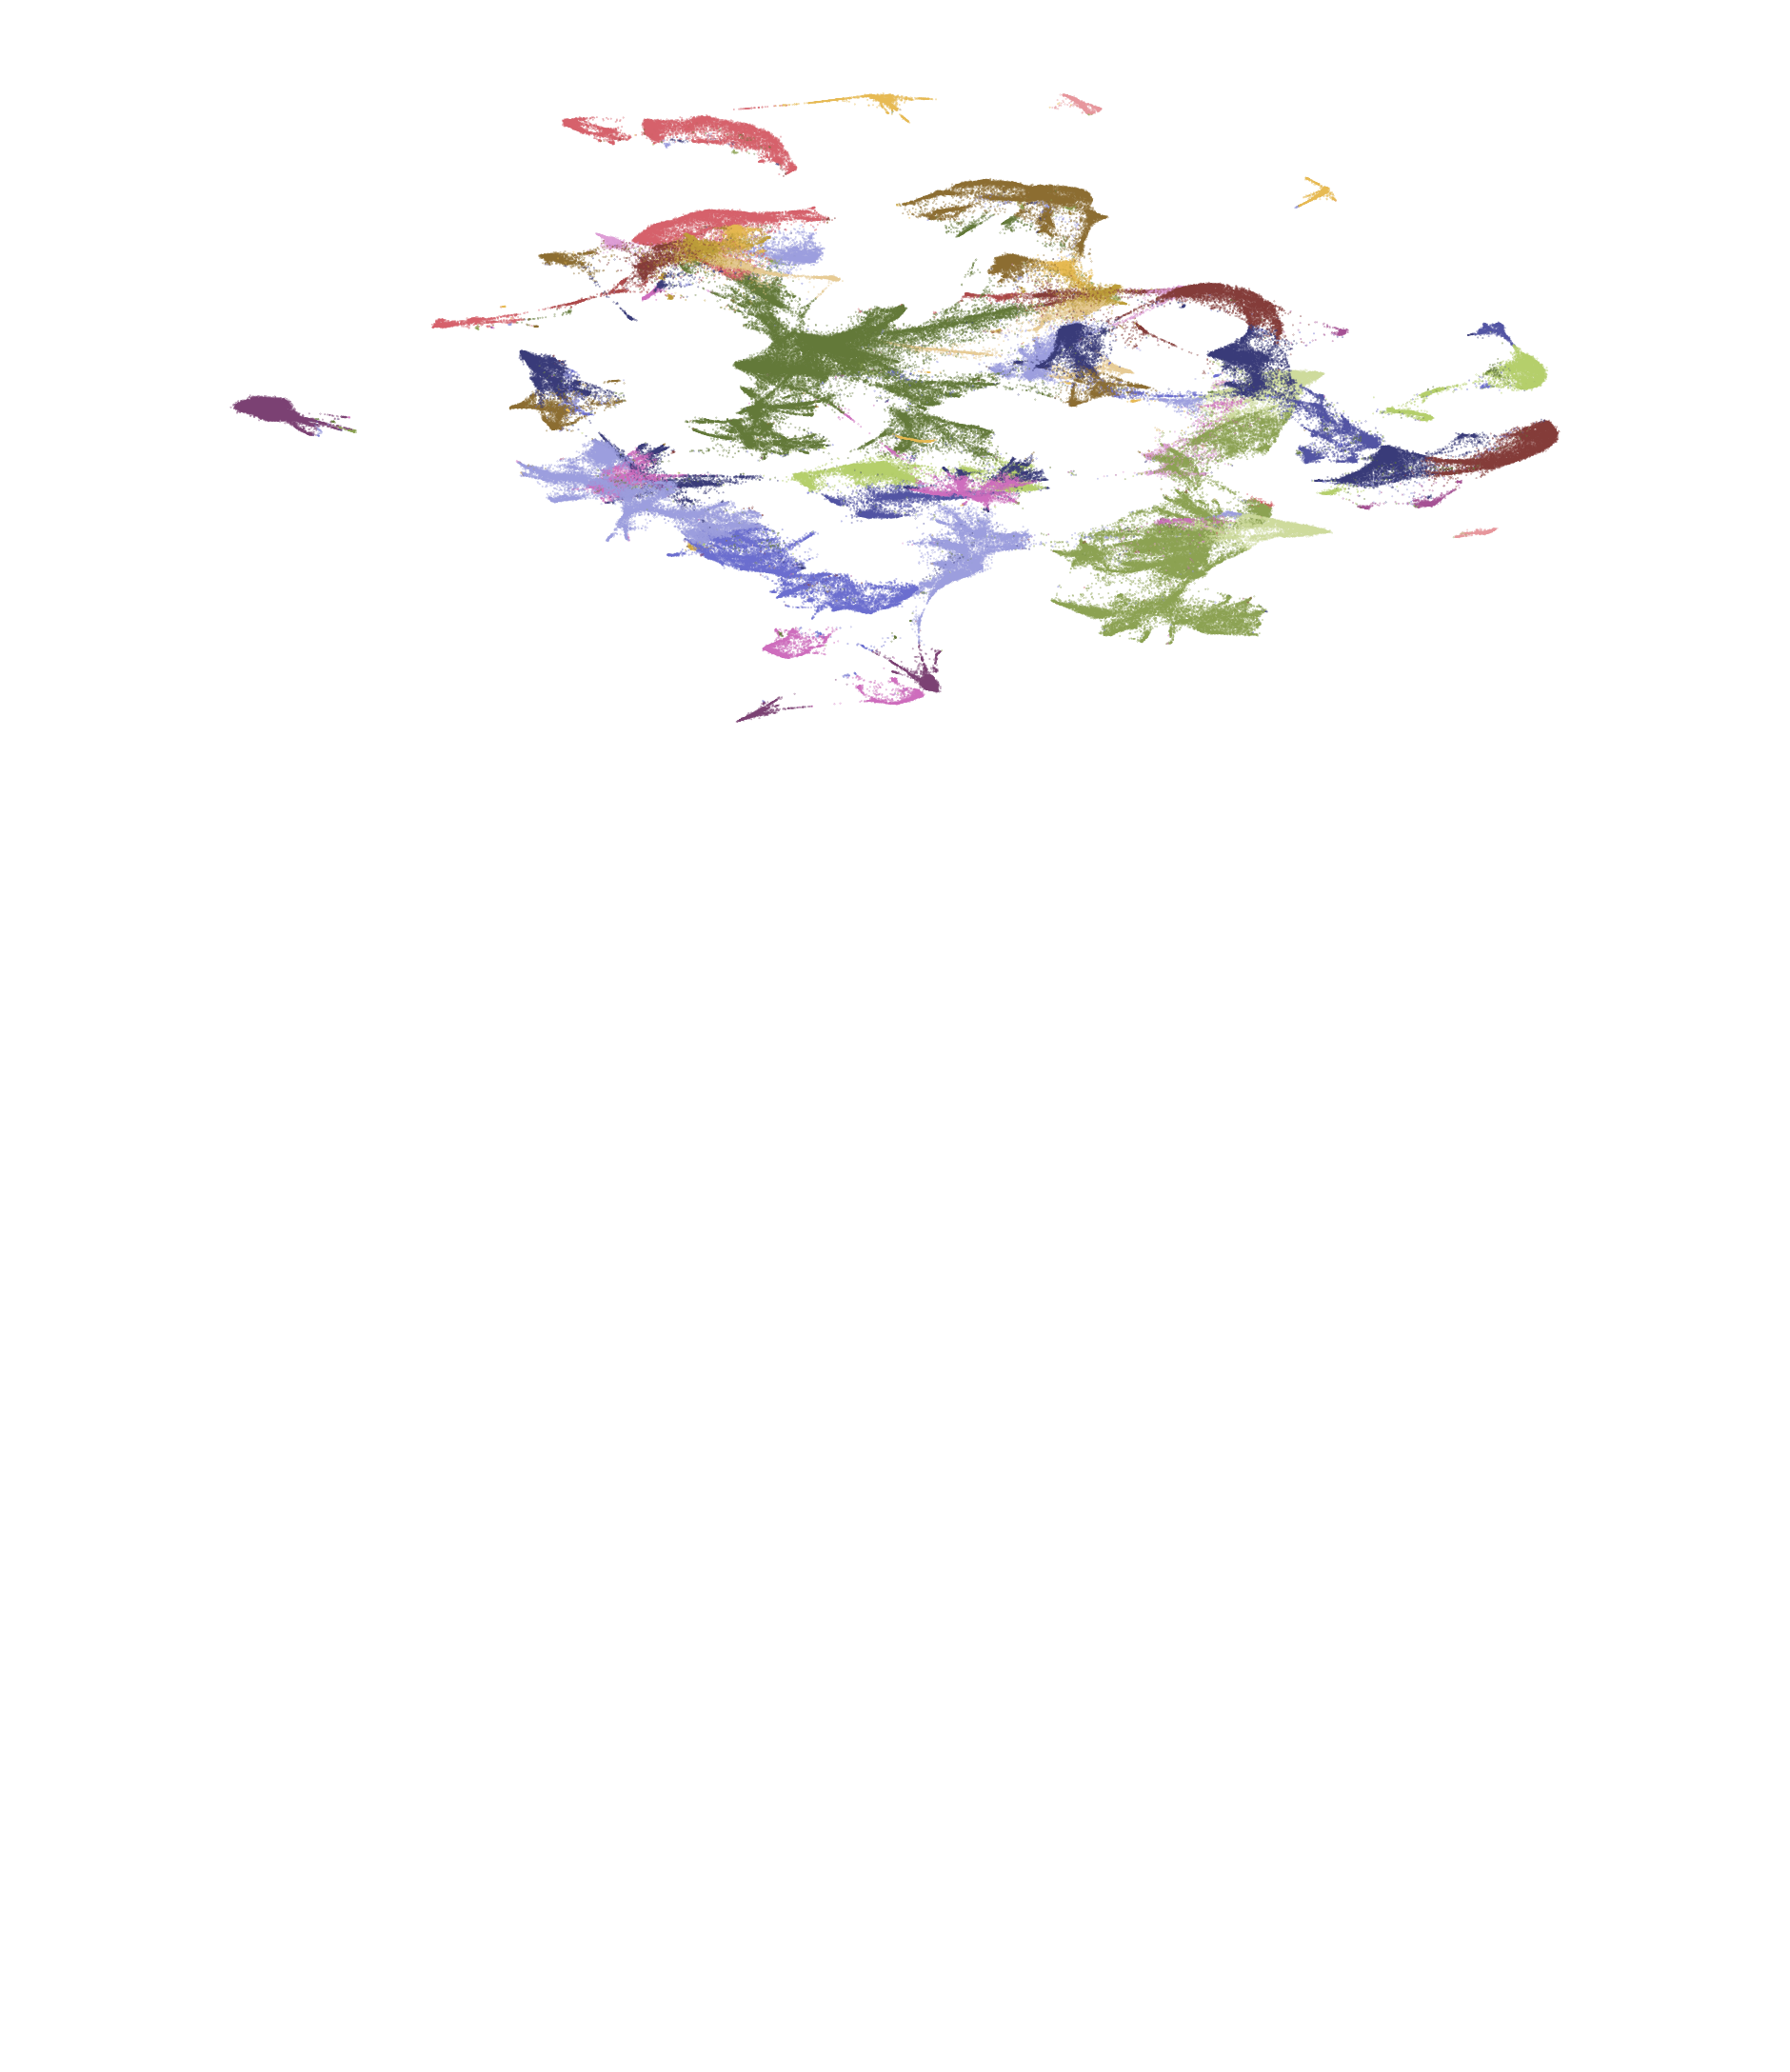

MovieWriter Pillow unavailable; using Pillow instead.


In [ ]:
### PLOT AND ANIM

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(24, 28))
scat = ax.scatter(adata.obs['umap-1'].values, adata.obs['umap-2'].values, c=point_colors, s = 0.05)
ax.axis('off')
plt.xlim(0, 2)
plt.ylim(-0.2, 4.7)

x2, y2 = adata.obs['x_centroid'].values, adata.obs['y_centroid'].values
x1, y1 = adata.obs['umap-1'].values, adata.obs['umap-2'].values

# Function to interpolate points between two sets of coordinates
def interpolate_points(x1, y1, x2, y2, t):
    
    return (1 - t) * x1 + t * x2, (1 - t) * y1 + t * y2

# Animation update function
def update(frame):
    t = frame / n_frames  # Normalize frame index to range [0, 1]
    new_x, new_y = interpolate_points(adata.obs['umap-1'].values, adata.obs['umap-2'].values, 
                                      adata.obs['x_centroid'].values, adata.obs['y_centroid'].values, t)
    scat.set_offsets(np.c_[new_x, new_y])
    return scat,

# Number of frames for the animation
n_frames =25

# Create the animation
ani = FuncAnimation(fig, update, frames=n_frames, interval=10, blit=True)

# Display the animation
plt.show()

# To save the animation as a file (e.g., .mp4), uncomment the line below:
ani.save('scatter_transformation_run1-bis.gif', writer='Pillow')